<a href="https://colab.research.google.com/github/yago3243/Machine-Learning-/blob/main/machine_learning_curso_2_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)

filmes.columns = ['filmes_id','titulo','generos']

filmes.head()

,filmes_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
generos = filmes.generos.str.get_dummies()
fil
dados_dos_filmes = pd.concat([filmes, generos], axis=1)

dados_dos_filmes.head()


,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)

generos_escalados


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
modelo = KMeans(n_clusters =3)
modelo.fit(generos_escalados)
print(f"Grupo : {modelo.labels_}")

Grupo : [1 1 0 ... 0 1 0]


In [ ]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03511692 -0.27030649 -0.24523151 -0.24248888 -0.18997543  0.2233879
  -0.27406371  0.12590612  0.10988491 -0.17661917 -0.08970998 -0.11091083
  -0.10897427  0.01922189 -0.21731388  0.18311141 -0.16641262 -0.48671279
   0.08027184  0.04812484]
 [-0.05917995  0.51187432  1.50518781  1.66116032  1.45405484 -0.01603668
  -0.32764987 -0.20966586 -0.66826494  1.19070266 -0.09492563 -0.2448514
   0.61761544  0.25356183 -0.14640705 -0.28899517  0.57299849 -0.41941528
  -0.17272303 -0.1007734 ]
 [-0.05917995  0.42659014 -0.14749301 -0.23458962 -0.26217426 -0.56155714
   0.86731853 -0.21347157  0.06291107 -0.16099515  0.27757208  0.40864452
  -0.03922233 -0.17924792  0.62948858 -0.31864418  0.13019843  1.45684699
  -

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.035117,-0.270306,-0.245232,-0.242489,-0.189975,0.223388,-0.274064,0.125906,0.109885,-0.176619,-0.089710,-0.110911,-0.108974,0.019222,-0.217314,0.183111,-0.166413,-0.486713,0.080272,0.048125
1,-0.059180,0.511874,1.505188,1.661160,1.454055,-0.016037,-0.327650,-0.209666,-0.668265,1.190703,-0.094926,-0.244851,0.617615,0.253562,-0.146407,-0.288995,0.572998,-0.419415,-0.172723,-0.100773
2,-0.059180,0.426590,-0.147493,-0.234590,-0.262174,-0.561557,0.867319,-0.213472,0.062911,-0.160995,0.277572,0.408645,-0.039222,-0.179248,0.629489,-0.318644,0.130198,1.456847,-0.116045,-0.070998


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb991b3ab70>,
      dtype=object)

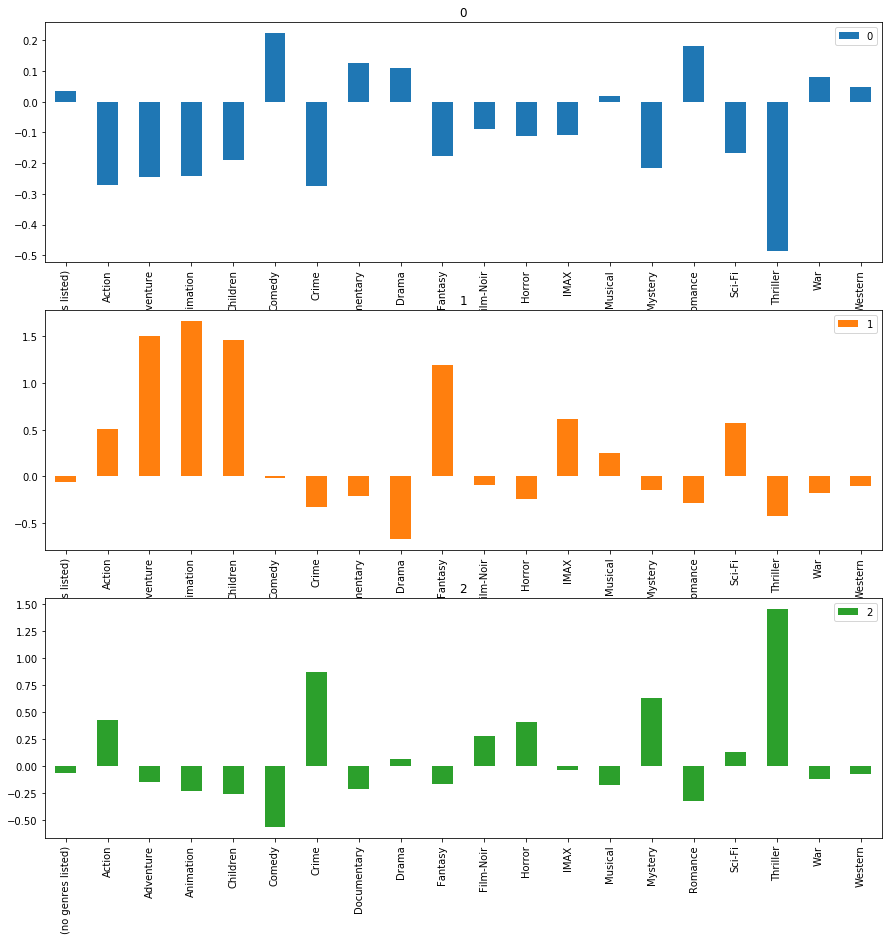

In [ ]:
grupos.transpose().plot.bar(subplots = True, figsize=(15,15), sharex = False)

In [ ]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8557,116138,Leviathan (2014),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3827,5365,"Lady and the Duke, The (Anglaise et le duc, L'...",Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3034,4062,Mystic Pizza (1988),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
343,386,S.F.W. (1994),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5515,26498,Boy Meets Girl (1984),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3969,5597,Suburban Commando (1991),Comedy|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2920,3916,Remember the Titans (2000),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4090,5847,Ragtime (1981),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3496,4777,"American Astronaut, The (2001)",Comedy|Musical|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8980,138546,The Opposite Sex (2014),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao


array([[ 25.7807   ,  30.59592  ],
       [ 52.892235 ,  20.682518 ],
       [-20.141333 ,  46.67547  ],
       ...,
       [ 13.282865 , -14.5474415],
       [ 18.002447 ,  13.81503  ],
       [ -8.428988 ,  19.476255 ]], dtype=float32)

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x = visualizacao[:, 0] , 
                y = visualizacao[:, 1], 
                hue = modelo.labels_,
                palette = sns.color_palette('Set1', 3))

NameError: ignored

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb98d8c5a58>,
      dtype=object)

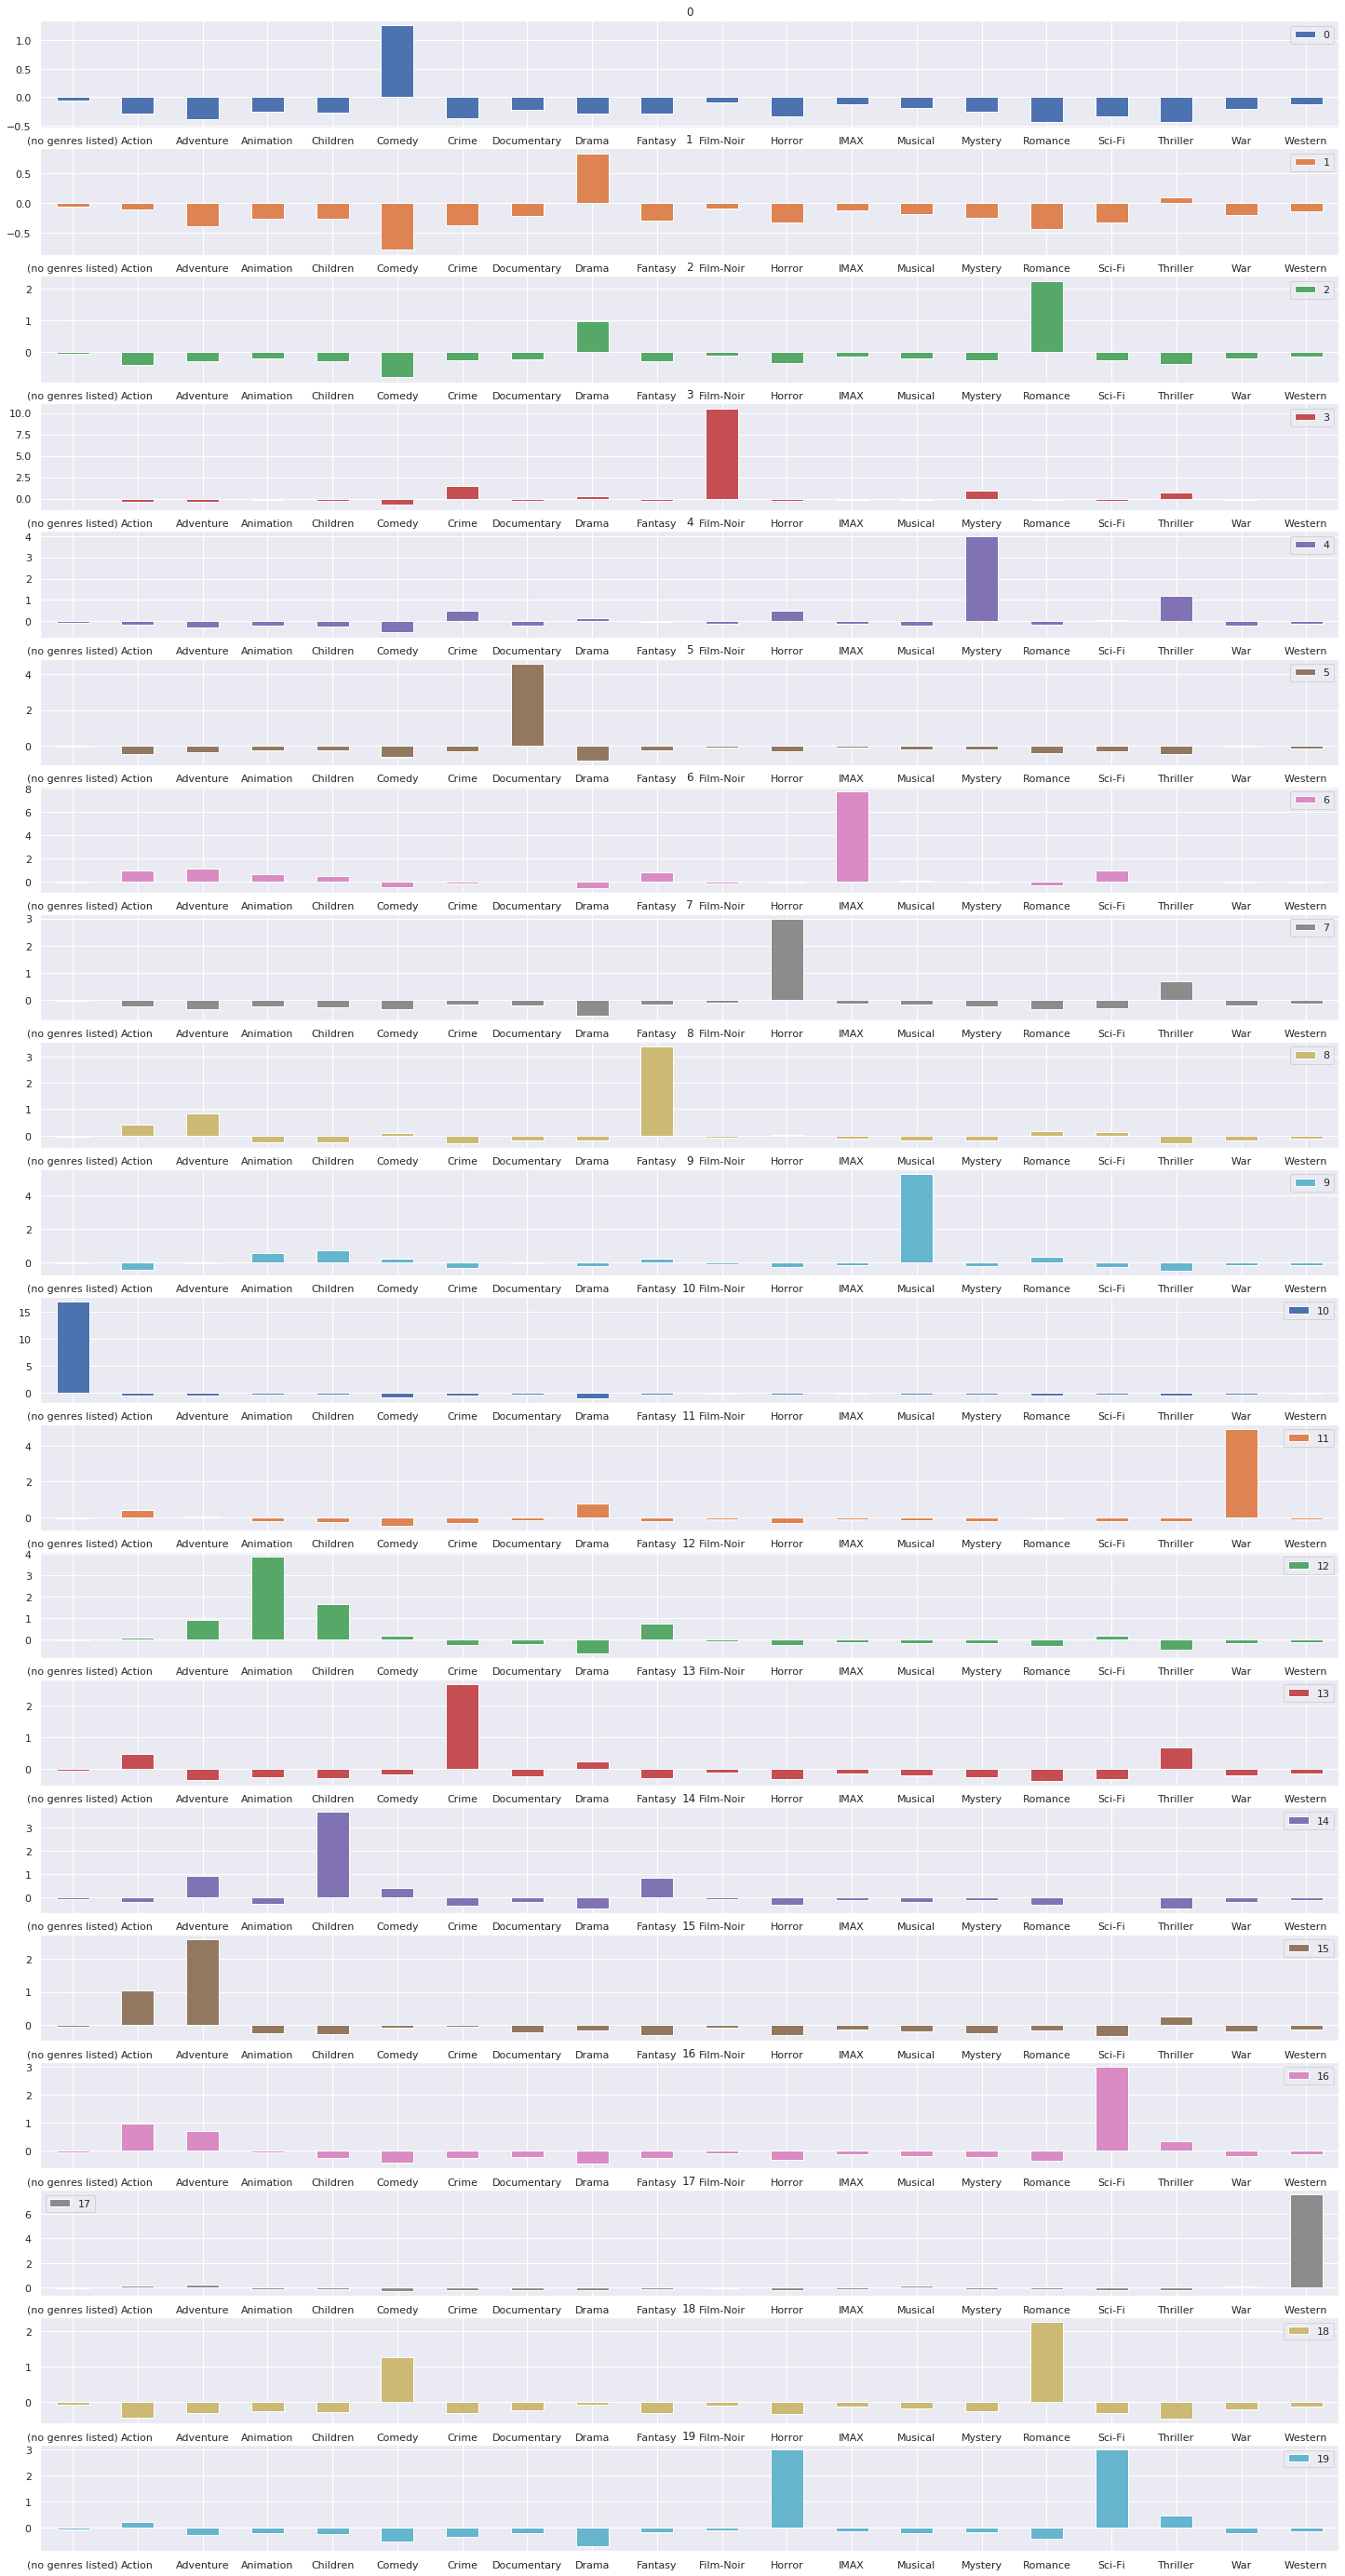

In [ ]:
modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)

grupos.transpose().plot.bar(subplots = True, figsize=(25,50), sharex = False,
                            rot=0)


In [ ]:
grupo = 8
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1768,2366,King Kong (1933),Action|Adventure|Fantasy|Horror,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2009,2674,"Loss of Sexual Innocence, The (1999)",Drama|Fantasy,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7742,90888,Immortals (2011),Action|Drama|Fantasy,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
723,943,"Ghost and Mrs. Muir, The (1947)",Drama|Fantasy|Romance,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
6723,58972,Nim's Island (2008),Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1576,2115,Indiana Jones and the Temple of Doom (1984),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2603,3479,Ladyhawke (1985),Adventure|Fantasy|Romance,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2044,2723,Mystery Men (1999),Action|Comedy|Fantasy,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7993,96935,My Left Eye Sees Ghosts (Ngo joh aan gin diy g...,Comedy|Fantasy|Romance,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-11.074098 ,  67.60098  ],
       [-78.4606   ,  10.019438 ],
       [ -9.942071 , -32.600174 ],
       ...,
       [-25.12739  ,  -4.6419177],
       [-17.38567  ,  53.463745 ],
       [ 10.038956 ,  13.576379 ]], dtype=float32)

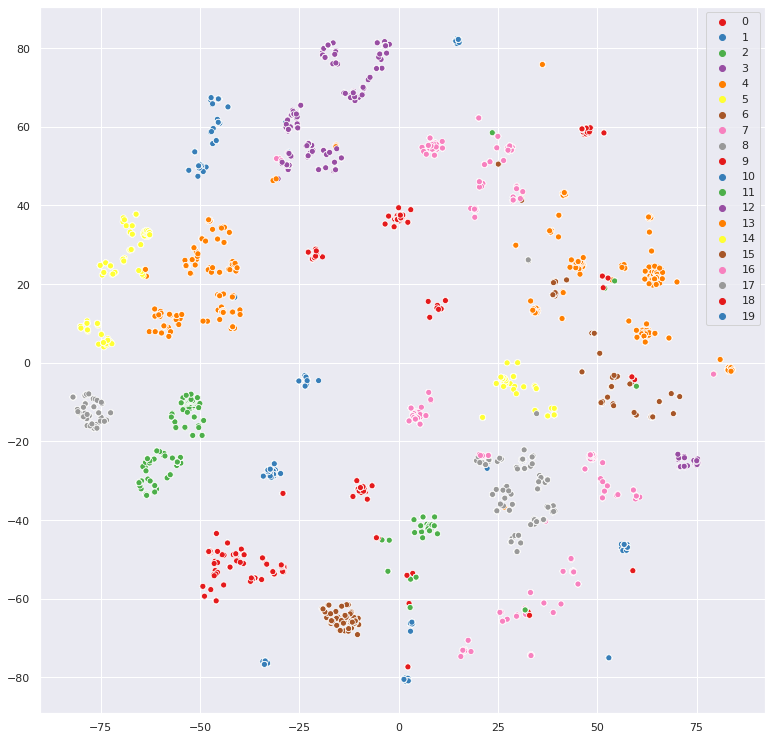

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})


sns.scatterplot(x = visualizacao[:, 0] , 
                y = visualizacao[:, 1], 
                hue = modelo.labels_,
                palette = sns.color_palette('Set1', 20))

In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return[numero_de_clusters, modelo.inertia_]

In [ ]:
kmeans(20, generos_escalados)


[20, 56476.04096659863]

In [ ]:
kmeans(3,generos_escalados)

[3, 166155.15885938797]

In [ ]:
resultado = [kmeans(numeros_de_grupos,generos_escalados) for numeros_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179528.16927707611],
 [3, 166103.89188928014],
 [4, 155798.97588295478],
 [5, 146386.65880989004],
 [6, 137914.78407996034],
 [7, 128699.69800241955],
 [8, 119682.62846974829],
 [9, 111640.86994639573],
 [10, 103473.78578268386],
 [11, 94528.0620835927],
 [12, 87416.47342276601],
 [13, 79401.47251330223],
 [14, 75709.56571825333],
 [15, 68189.63533583248],
 [16, 65096.36455155848],
 [17, 60378.3469151896],
 [18, 59579.12205271151],
 [19, 56295.37263331034],
 [20, 55548.29156959287],
 [21, 53986.6305769825],
 [22, 52455.97087604521],
 [23, 50728.01117911519],
 [24, 49735.04244017912],
 [25, 48138.708217355925],
 [26, 47144.15322353685],
 [27, 46379.38675020386],
 [28, 45332.73206103122],
 [29, 43513.481024322464],
 [30, 42563.57986468578],
 [31, 41720.91894755815],
 [32, 41281.57839442868],
 [33, 40142.42453990125],
 [34, 39604.82599120394],
 [35, 38370.5724260587],
 [36, 38314.01749305662],
 [37, 37591.60281899176],
 [38, 36957.04162757096],
 [39, 36307.59846849442

In [ ]:
resultado = pd.DataFrame(resultado,
             columns = ["grupos","inertia"])

resultado



,grupos,inertia
0,1,194840.000000
1,2,179528.169277
2,3,166103.891889
3,4,155798.975883
4,5,146386.658810
5,6,137914.784080
6,7,128699.698002
7,8,119682.628470
8,9,111640.869946
9,10,103473.785783


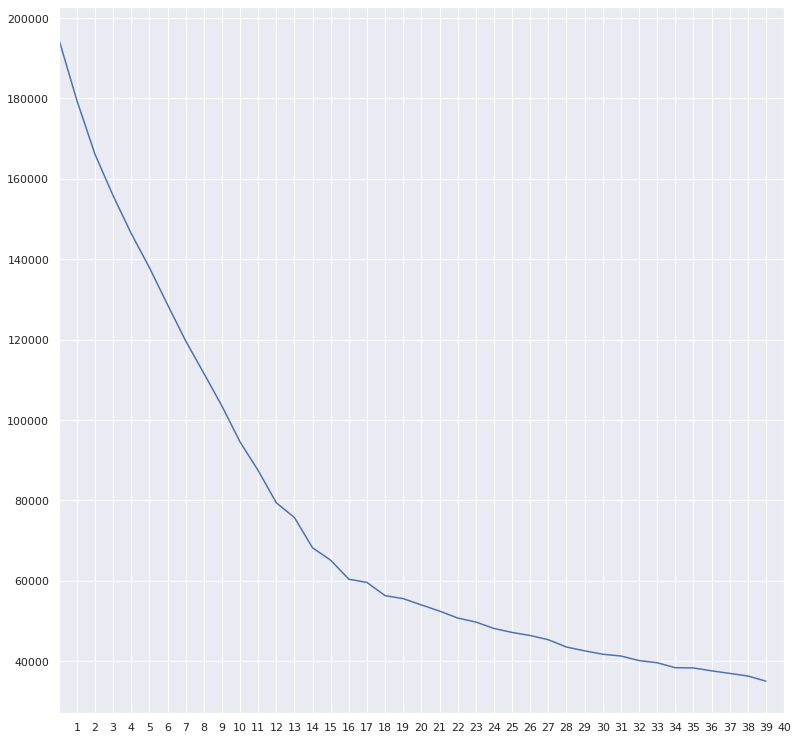

In [ ]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb98b238048>,
      dtype=object)

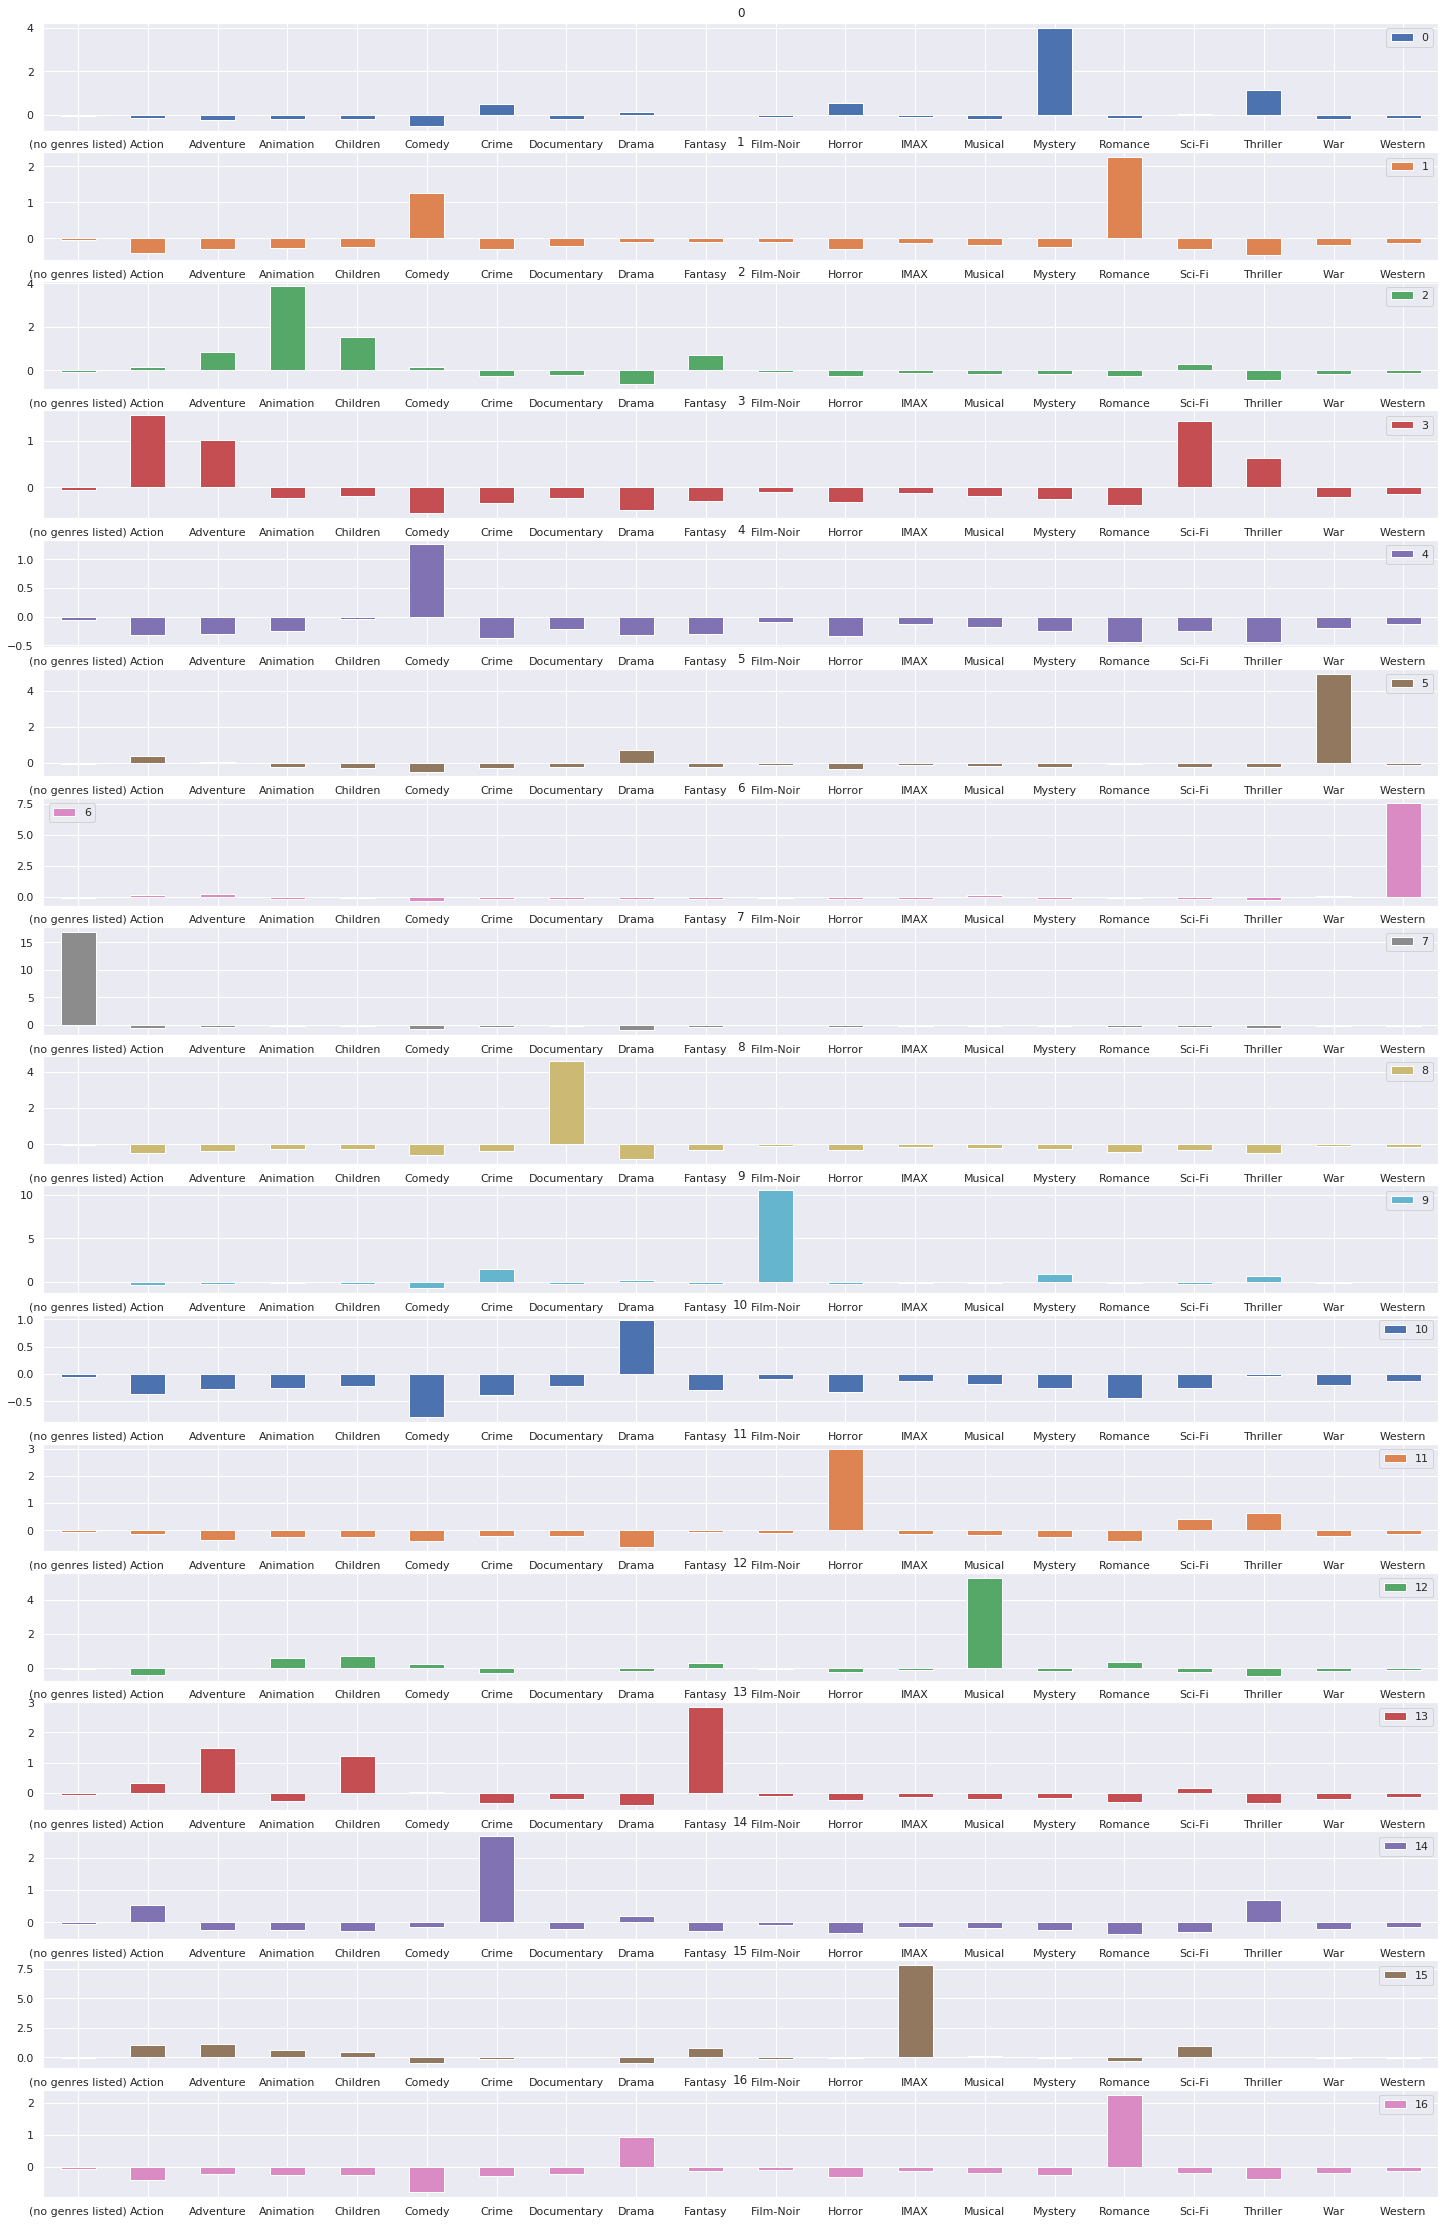

In [ ]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)

grupos.transpose().plot.bar(subplots = True,
                            figsize=(25,40),
                            sharex = False,
                            rot=0)


In [ ]:
grupo = 5
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
883,1178,Paths of Glory (1957),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5761,31116,Sergeant York (1941),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4783,7122,King of Hearts (1966),Comedy|Drama|War,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
65,73,"Misérables, Les (1995)",Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3260,4407,Salvador (1986),Drama|Thriller|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3940,5541,Hot Shots! (1991),Action|Comedy|Romance|War,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2783,3724,Coming Home (1978),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5664,27611,Battlestar Galactica (2003),Drama|Sci-Fi|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
6363,49688,"Dam Busters, The (1955)",Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2049,2728,Spartacus (1960),Action|Drama|Romance|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


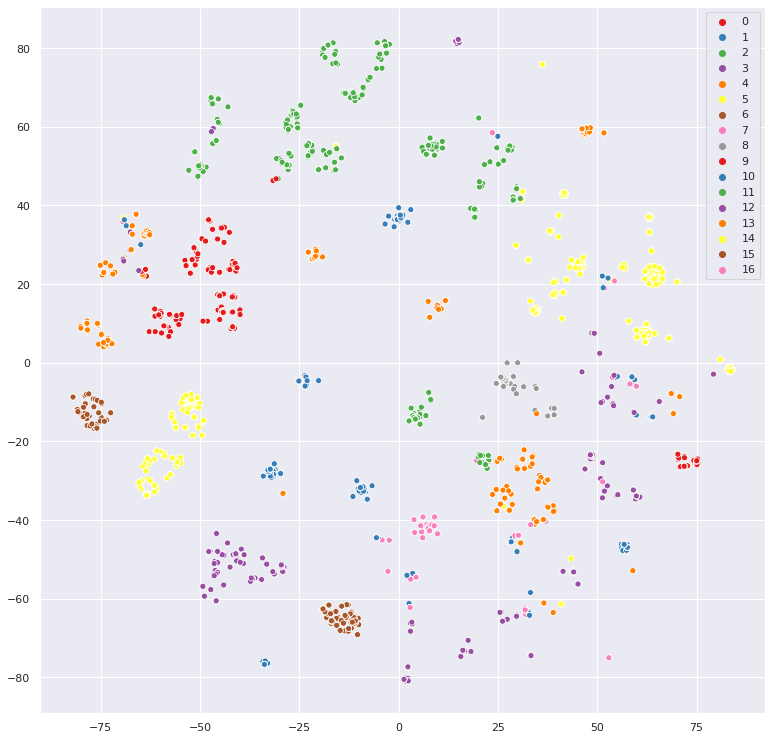

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})


sns.scatterplot(x = visualizacao[:, 0] , 
                y = visualizacao[:, 1], 
                hue = modelo.labels_,
                palette = sns.color_palette('Set1', 17))

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
modelo = AgglomerativeClustering(n_clusters=16)
grupos = modelo.fit_predict(generos_escalados)
grupos


array([ 5, 14, 13, ...,  0,  5,  0])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao


array([[ 45.326603,  50.452896],
       [-42.822224,  11.456177],
       [ 12.359179, -42.08235 ],
       ...,
       [-15.803195,  17.85643 ],
       [ 24.623503,  50.55207 ],
       [  8.926428, -12.491372]], dtype=float32)

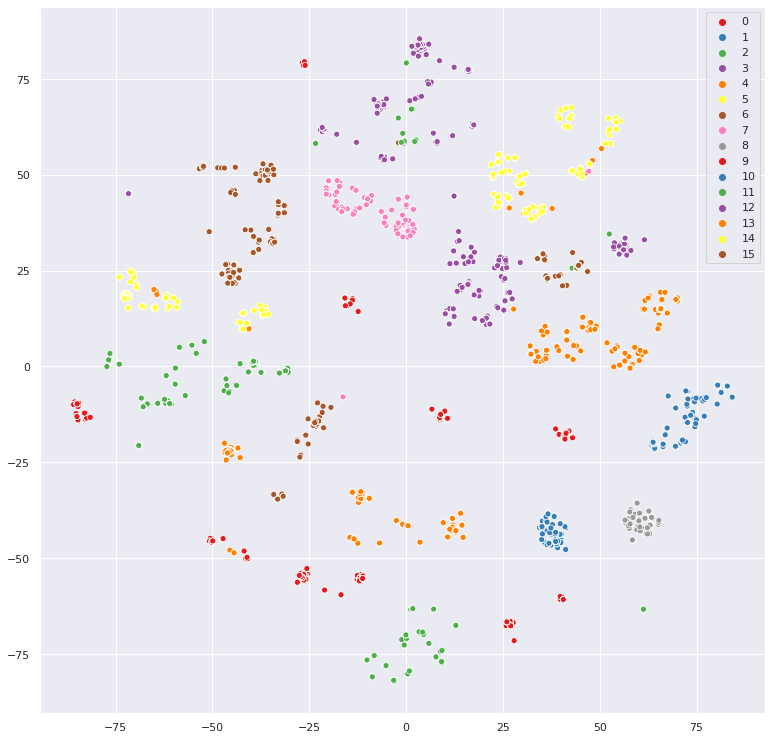

In [ ]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos,
                palette =sns.color_palette("Set1",16))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb98a525f28>,
      dtype=object)

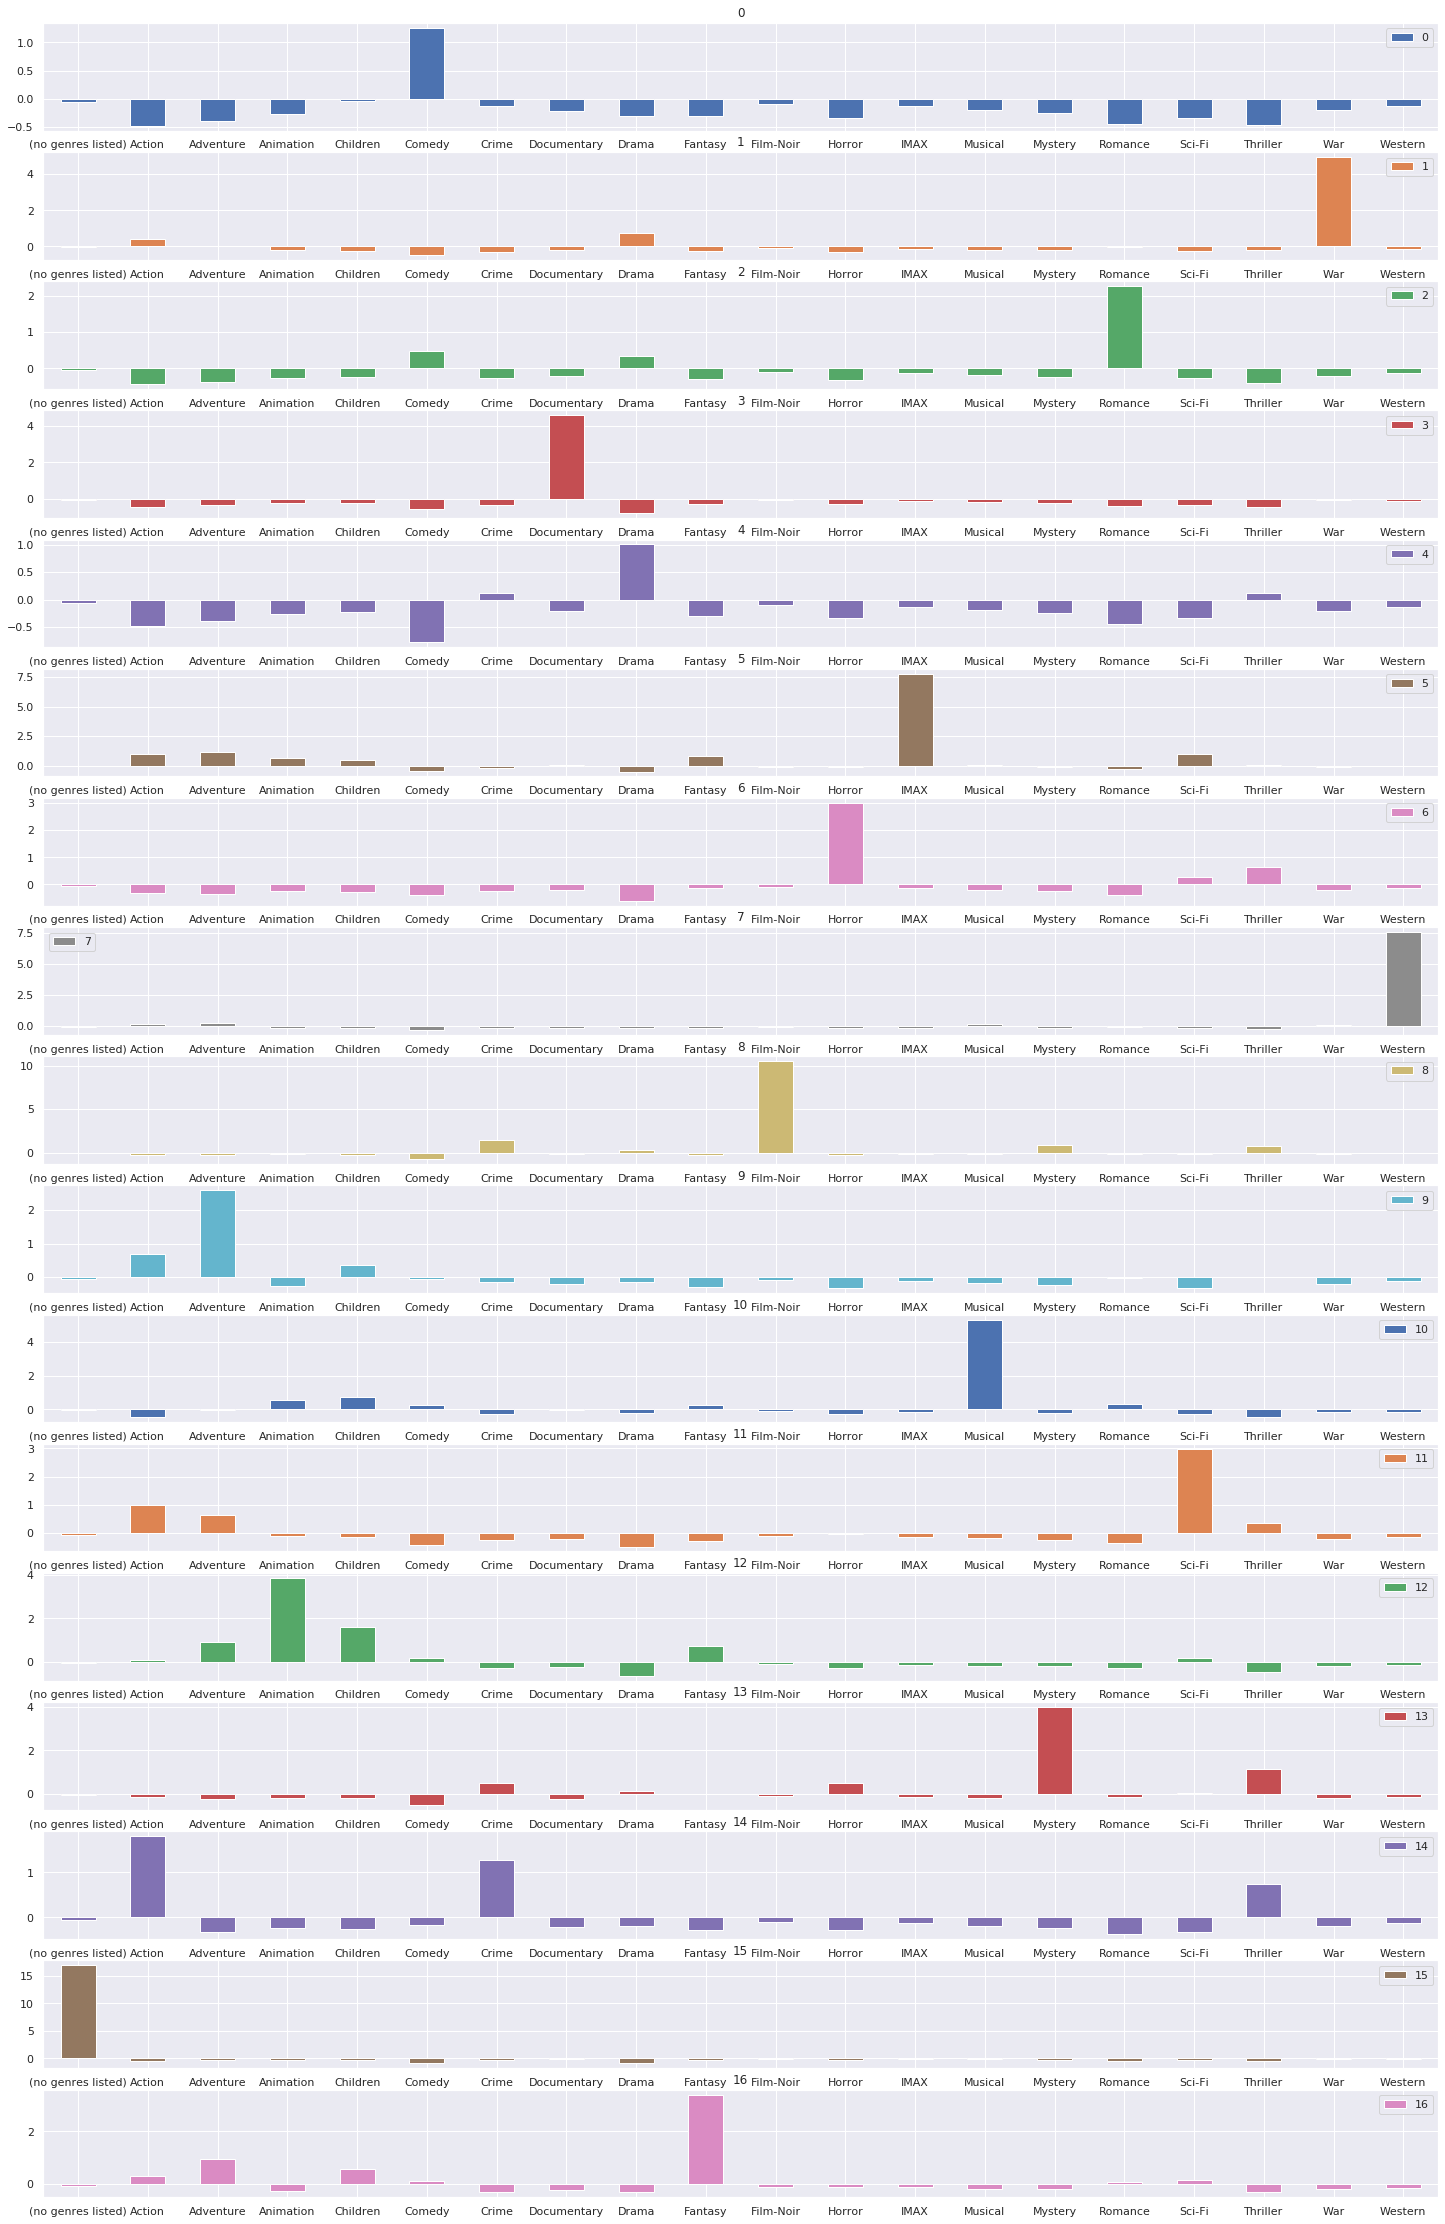

In [ ]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)

grupos.transpose().plot.bar(subplots = True,
                            figsize=(25,40),
                            sharex = False,
                            rot=0)